In [3]:
import os
import glob
for filename in glob.glob('db/*.csv'):
    print(filename)

db/Tags.csv
db/Questions.csv


In [4]:
import pandas as pd
import numpy as np

filenames = [filename for filename in glob.glob('db/*.csv')]
print(filenames)

['db/Tags.csv', 'db/Questions.csv']


In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df = None
df_temp = None
for filename in filenames:
  df_temp = pd.read_csv(filename, encoding='ISO-8859-1')
  if df is not None:
    df = df.merge(df_temp, on='Id')
  else:
    df = df_temp

df.describe()

,Id,OwnerUserId,Score
count,"1,885,074.00","1,867,088.00","1,885,074.00"
mean,"23,917,912.86","2,519,479.37",2.32
std,"11,214,901.28","1,902,873.64",20.38
min,469.00,25.00,-44.00
25%,"15,187,488.00","862,345.00",0.00
50%,"25,597,453.50","2,118,197.00",1.00
75%,"33,728,792.00","3,979,666.75",2.00
max,"40,143,365.00","7,044,992.00","5,524.00"


In [6]:
df.head()

,Id,Tag,OwnerUserId,CreationDate,Score,Title,Body
0,469,python,147.00,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,469,osx,147.00,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
2,469,fonts,147.00,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
3,469,photoshop,147.00,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
4,502,python,147.00,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...


In [7]:
df.dtypes

Id                int64
Tag              object
OwnerUserId     float64
CreationDate     object
Score             int64
Title            object
Body             object
dtype: object

In [8]:
df.shape

(1885074, 7)

In [9]:
df.size

13195518

In [10]:
df = df.convert_dtypes()

In [11]:
df.dtypes

Id               Int64
Tag             string
OwnerUserId      Int64
CreationDate    string
Score            Int64
Title           string
Body            string
dtype: object

In [12]:
df.head()

,Id,Tag,OwnerUserId,CreationDate,Score,Title,Body
0,469,python,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,469,osx,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
2,469,fonts,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
3,469,photoshop,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
4,502,python,147,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...


In [13]:
df[['Tag']] = df[['Tag']].astype('category')
df.dtypes

Id                 Int64
Tag             category
OwnerUserId        Int64
CreationDate      string
Score              Int64
Title             string
Body              string
dtype: object

## How many tags are?

In [14]:
df['Tag'].unique()

[python, osx, fonts, photoshop, windows, ..., workload-scheduler, go-to-definition, trackball, pi0, xml-libxml]
Length: 16896
Categories (16895, object): [python, osx, fonts, photoshop, ..., go-to-definition, trackball, pi0,
                             xml-libxml]

### There are 16896 tags

## Top 10 asked tags

In [15]:
tag_serie = df['Tag'].value_counts()
tag_serie

python         607282
django          62818
python-2.7      34616
pandas          26854
python-3.x      26814
                ...  
line.me             1
lineseries          1
linguaplone         1
linguini            1
managed-c++         1
Name: Tag, Length: 16895, dtype: int64

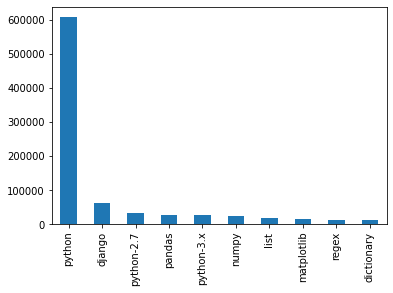

In [16]:
tag_serie.head(10).plot.bar()

In [17]:
tag_serie = tag_serie.iloc[1:]
tag_serie

django         62818
python-2.7     34616
pandas         26854
python-3.x     26814
numpy          25848
               ...  
line.me            1
lineseries         1
linguaplone        1
linguini           1
managed-c++        1
Name: Tag, Length: 16894, dtype: int64

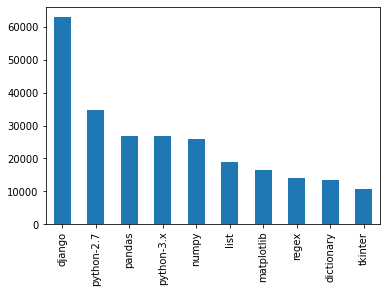

In [18]:
tag_serie.head(10).plot.bar()

### When removing the 'python' general tag, one can see that the tag with most question is Django by far, followed by python2.7. 

## Top 5 most/least scored questions:

In [50]:
df = df.dropna()
df

,Id,Tag,OwnerUserId,CreationDate,Score,Title,Body
0,469,python,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,469,osx,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
2,469,fonts,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
3,469,photoshop,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
4,502,python,147,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
...,...,...,...,...,...,...,...
1885069,40143338,python,7044980,2016-10-19T23:52:27Z,2,Most possible pairs,"<p>Given a list of values, and information on ..."
1885070,40143365,python,4133131,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...
1885071,40143365,numpy,4133131,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...
1885072,40143365,theano,4133131,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...


In [65]:
df_scores = df.copy()
df_scores = df_scores.set_index('Id')

In [66]:
df_scores['tags'] = df_scores.groupby('Id')['Tag'].agg(','.join)
df_scores
#https://stackoverflow.com/questions/38127209/how-to-use-groupby-to-concatenate-strings-in-python-pandas

,Tag,OwnerUserId,CreationDate,Score,Title,Body,tags
Id,,,,,,,
469,python,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,"python,osx,fonts,photoshop"
469,osx,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,"python,osx,fonts,photoshop"
469,fonts,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,"python,osx,fonts,photoshop"
469,photoshop,147,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,"python,osx,fonts,photoshop"
502,python,147,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,"python,windows,image,pdf"
...,...,...,...,...,...,...,...
40143338,python,7044980,2016-10-19T23:52:27Z,2,Most possible pairs,"<p>Given a list of values, and information on ...",python
40143365,python,4133131,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...,"python,numpy,theano,nnet"
40143365,numpy,4133131,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...,"python,numpy,theano,nnet"


In [ ]:
df_scores = df_scores.drop(columns=['Tag'])

In [70]:
df_scores = df_scores.sort_values('Score', ascending=False)
df_scores = df_scores.drop_duplicates()
df_scores

,OwnerUserId,CreationDate,Score,Title,Body,tags
Id,,,,,,
231767,18300,2008-10-23T22:21:11Z,5524,"What does the ""yield"" keyword do?",<p>What is the use of the <code>yield</code> k...,"python,iterator,generator,yield,coroutine"
100003,9951,2008-09-19T06:10:46Z,3219,What is a metaclass in Python?,<p>What are metaclasses? What do you use them ...,"python,oop,metaclass,python-datamodel"
82831,15616,2008-09-17T12:55:00Z,2729,How do I check whether a file exists using Pyt...,"<p>How do I check whether a file exists, witho...","python,file,filesystems"
394809,51518,2008-12-27T08:32:18Z,2655,Does Python have a ternary conditional operator?,<p>If Python does not have a ternary condition...,"python,operators,ternary-operator,conditional-..."
89228,17085,2008-09-18T01:35:30Z,2312,Calling an external command in Python,<p>How can I call an external command (as if I...,"python,shell,command,subprocess,external"
...,...,...,...,...,...,...
32191198,4864486,2015-08-24T20:29:31Z,-18,I would like to split this into a list but i d...,<p>I have this string </p> <pre><code>var(HEL...,"python,python-3.x,split"
26724585,4212189,2014-11-03T22:38:03Z,-18,What is equivalent of Python's time.time() in ...,<p>what is the Perl equivalent of Python's tim...,"python,perl"
38567618,3809375,2016-07-25T12:20:48Z,-19,Recursive to iterative using a systematic method,"<p>I've started reading the book <em><a href=""...","python,recursion"


In [72]:
df_scores.head(5)

,OwnerUserId,CreationDate,Score,Title,Body,tags
Id,,,,,,
231767,18300,2008-10-23T22:21:11Z,5524,"What does the ""yield"" keyword do?",<p>What is the use of the <code>yield</code> k...,"python,iterator,generator,yield,coroutine"
100003,9951,2008-09-19T06:10:46Z,3219,What is a metaclass in Python?,<p>What are metaclasses? What do you use them ...,"python,oop,metaclass,python-datamodel"
82831,15616,2008-09-17T12:55:00Z,2729,How do I check whether a file exists using Pyt...,"<p>How do I check whether a file exists, witho...","python,file,filesystems"
394809,51518,2008-12-27T08:32:18Z,2655,Does Python have a ternary conditional operator?,<p>If Python does not have a ternary condition...,"python,operators,ternary-operator,conditional-..."
89228,17085,2008-09-18T01:35:30Z,2312,Calling an external command in Python,<p>How can I call an external command (as if I...,"python,shell,command,subprocess,external"


In [73]:
df_scores.tail(5)

,OwnerUserId,CreationDate,Score,Title,Body,tags
Id,,,,,,
32191198,4864486,2015-08-24T20:29:31Z,-18,I would like to split this into a list but i d...,<p>I have this string </p> <pre><code>var(HEL...,"python,python-3.x,split"
26724585,4212189,2014-11-03T22:38:03Z,-18,What is equivalent of Python's time.time() in ...,<p>what is the Perl equivalent of Python's tim...,"python,perl"
38567618,3809375,2016-07-25T12:20:48Z,-19,Recursive to iterative using a systematic method,"<p>I've started reading the book <em><a href=""...","python,recursion"
30402552,4674272,2015-05-22T17:24:40Z,-32,How to multiply the same number? (x^2),<p>I need a program in Python that would read ...,"python,square"
25970488,2955338,2014-09-22T09:16:37Z,-44,How to collate attribute values stored as dict...,<p>In my list each element is a dict of the fo...,"python,list,python-2.7,attributes,collation"


## Tags by score

In [84]:
mean_scores_tags = df.groupby('Tag')['Score'].mean()
mean_scores_tags

Tag
.app              0.92
.aspxauth         0.00
.bash-profile     1.59
.class-file       0.00
.doc              0.25
                  ... 
ztree             0.00
zune              5.00
zurb-foundation   0.33
zxing             5.80
zypper            1.00
Name: Score, Length: 16895, dtype: float64

In [88]:
mean_scores_tags.sort_values(ascending=False)

Tag
least-astonishment       504.67
hidden-features          309.00
metasyntactic-variable   251.00
business-logic-layer     209.00
copy-protection          204.50
                          ...  
wii                         nan
windows-screensaver         nan
windows-xp-sp3              nan
y-combinator                nan
zemanta                     nan
Name: Score, Length: 16895, dtype: float64

In [92]:
mean_scores_tags[mean_scores_tags.isna()]

Tag
authlogic                nan
conditional-breakpoint   nan
couchdb-futon            nan
dam                      nan
eda                      nan
fail2ban                 nan
fisheye                  nan
fmod                     nan
game-center              nan
gap-system               nan
guides                   nan
iocp                     nan
ipod-touch               nan
jzmq                     nan
magic-constants          nan
mars                     nan
mink                     nan
netbeans-6.9             nan
noise-generator          nan
ob-start                 nan
ora-03114                nan
outline-view             nan
pandastream              nan
pexcept                  nan
replay                   nan
running-balance          nan
simplewebrtc             nan
system-profiler          nan
tempodb                  nan
thinking-sphinx          nan
tiles-game               nan
tr1                      nan
wii                      nan
windows-screensaver      nan
windows-xp

In [94]:
mean_scores_tags = mean_scores_tags.dropna()
mean_scores_tags.sort_values()

Tag
asdf                      -6.00
hlsl                      -5.00
master-theorem            -4.00
triplet                   -4.00
object-address            -4.00
                          ...  
copy-protection          204.50
business-logic-layer     209.00
metasyntactic-variable   251.00
hidden-features          309.00
least-astonishment       504.67
Name: Score, Length: 16858, dtype: float64

In [95]:
mean_scores_tags.sort_values().tail(10)

Tag
timedelay                153.00
ase                      154.56
weakly-typed             164.00
information-hiding       174.00
interpreted              174.00
copy-protection          204.50
business-logic-layer     209.00
metasyntactic-variable   251.00
hidden-features          309.00
least-astonishment       504.67
Name: Score, dtype: float64

In [98]:
mean_scores_tags.sort_values().head(10)

Tag
asdf             -6.00
hlsl             -5.00
master-theorem   -4.00
triplet          -4.00
object-address   -4.00
hydra            -4.00
ultraedit        -4.00
mysql-fabric     -4.00
swift3           -3.00
gambling         -3.00
Name: Score, dtype: float64

In [103]:
max_scores_tags = df.groupby('Tag')['Score'].max()

In [104]:
max_scores_tags = max_scores_tags.dropna()
max_scores_tags.sort_values()

Tag
asdf                -6
hlsl                -5
object-address      -4
mysql-fabric        -4
master-theorem      -4
                  ... 
generator         5524
iterator          5524
python            5524
coroutine         5524
yield             5524
Name: Score, Length: 16858, dtype: Int64

In [106]:
min_scores_tags = df.groupby('Tag')['Score'].min()
min_scores_tags = min_scores_tags.dropna()
min_scores_tags.sort_values()

Tag
list                      -44
python-2.7                -44
python                    -44
attributes                -44
collation                 -44
                         ... 
boxing                    129
weakly-typed              164
business-logic-layer      209
metasyntactic-variable    251
hidden-features           309
Name: Score, Length: 16858, dtype: Int64

In [107]:
min_scores_tags.sort_values().tail(10)

Tag
time-measurement            63
fencepost                   69
blindness                   73
blind                       73
language-specifications    129
boxing                     129
weakly-typed               164
business-logic-layer       209
metasyntactic-variable     251
hidden-features            309
Name: Score, dtype: Int64

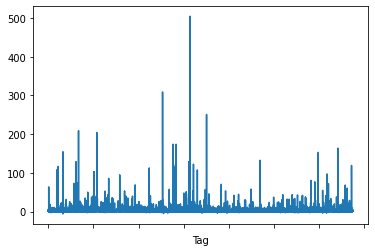

In [109]:
mean_scores_tags.plot()